## Decision Tree

Decision Tree 를 활용한 Classification 을 수행해 보겠습니다.

이 노트북에 사용된 데이터와 구현체는 아래 링크의 내용을 참고하였음을 밝힙니다. 
https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### 필요 환경 구축

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

### Diabetes(당뇨병) Dataset 불러오고, 정답 지우기
./input 폴더에 있는 diabetes.csv 파일을 읽습니다

In [7]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes.csv", header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Class Label 선택

In [12]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable
print( len(X), ",", len(y) )

768 , 768


### 훈련 및 테스트 데이터 준비
7:3 의 비율로 데이터를 준비

In [19]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("# of All : ", len(X))
print("# of Train : ", len(X_train))
print("# of Test : ", len(X_test))
#print(X.iloc[0])
#print("-"*10)
#print(X_train.iloc[0])

# of All :  768
# of Train :  537
# of Test :  231


### Decision Tree (Gini)

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### 성능측정하기

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Reference : ", y_test[:10].tolist())
print("Predicted : ", y_pred[:10].tolist())
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Reference :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.6883116883116883


### 시각화 툴 설치하기
Decision Tree 의 가장 큰 장점은 '설명가능성' 에 있습니다. 
즉, 어떠한 기준과 이유로 Classification 이 이루어졌는지를 모두 설명할 수 있기 때문입니다.
학습된 Decision Tree를 시각화해보겠습니다.

다음과 같은 python package 가 설치되어 있어야 합니다.
* graphviz
* pydotplus

또한, windows 의 경우 설치파일을 통해 graphviz 를 설치해야 할 수 있습니다.
https://www.graphviz.org/download/ 

In [24]:
# python package 설치하기
!pip install graphviz
!pip install pydotplus

### Decision Tree (GINI) 결과

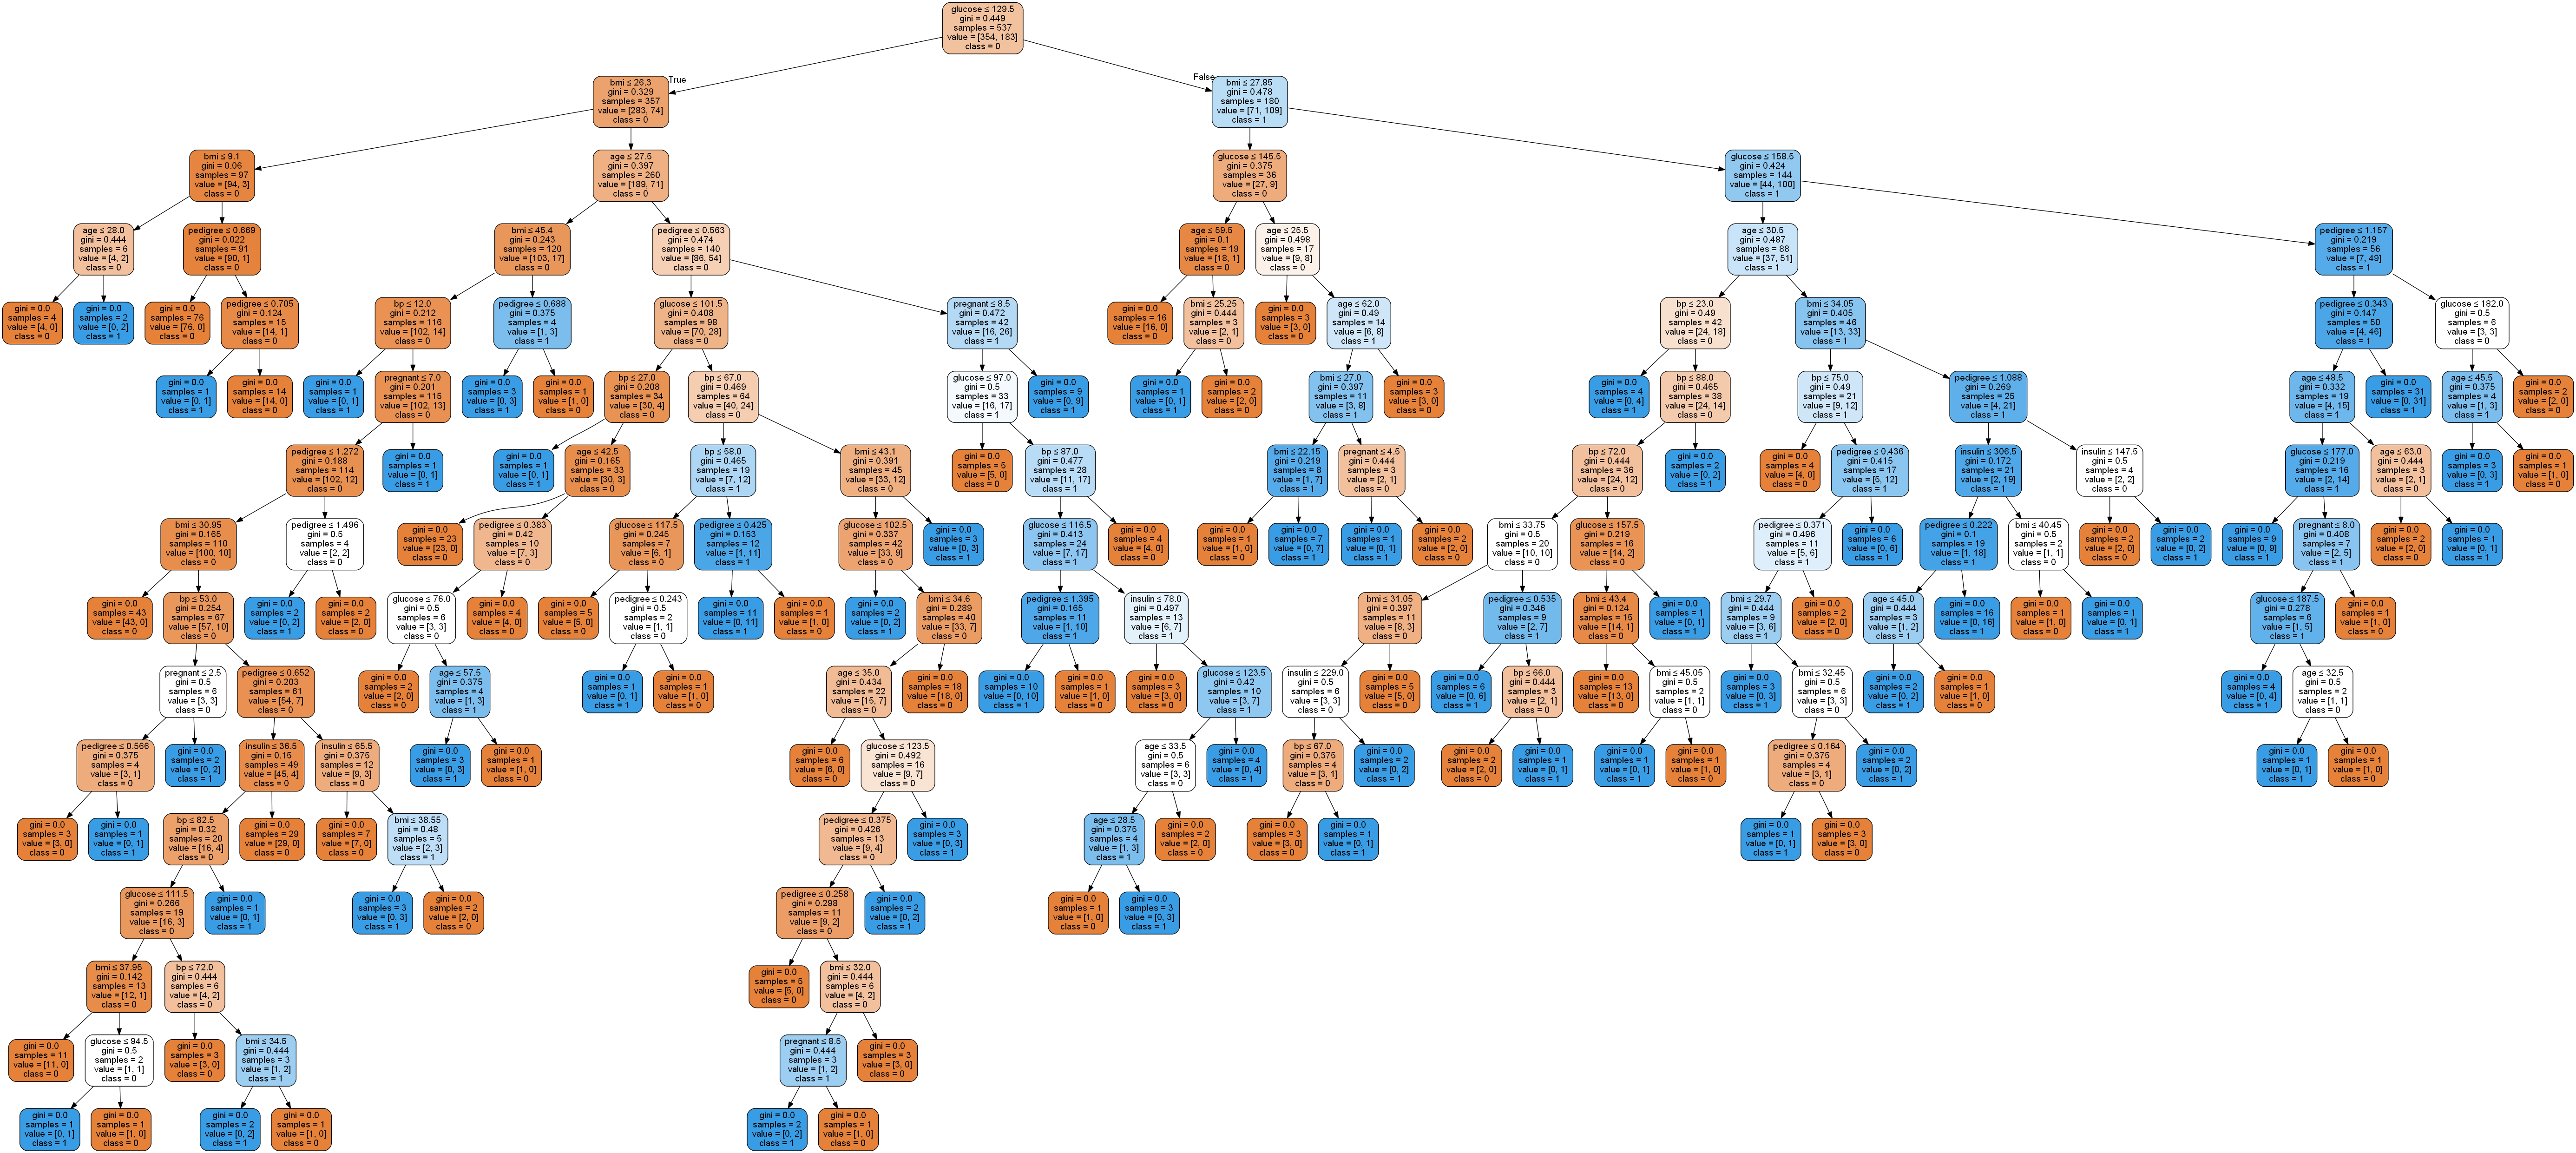

In [26]:
import sys
import os
os.environ["PATH"] += os.pathsep + os.pathsep.join(["C:\\Program Files (x86)\\Graphviz2.38\\bin"])

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Decision Tree (Entropy)

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### 성능측정하기

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Reference : ", y_test[:10].tolist())
print("Predicted : ", y_pred[:10].tolist())
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Reference :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.7705627705627706


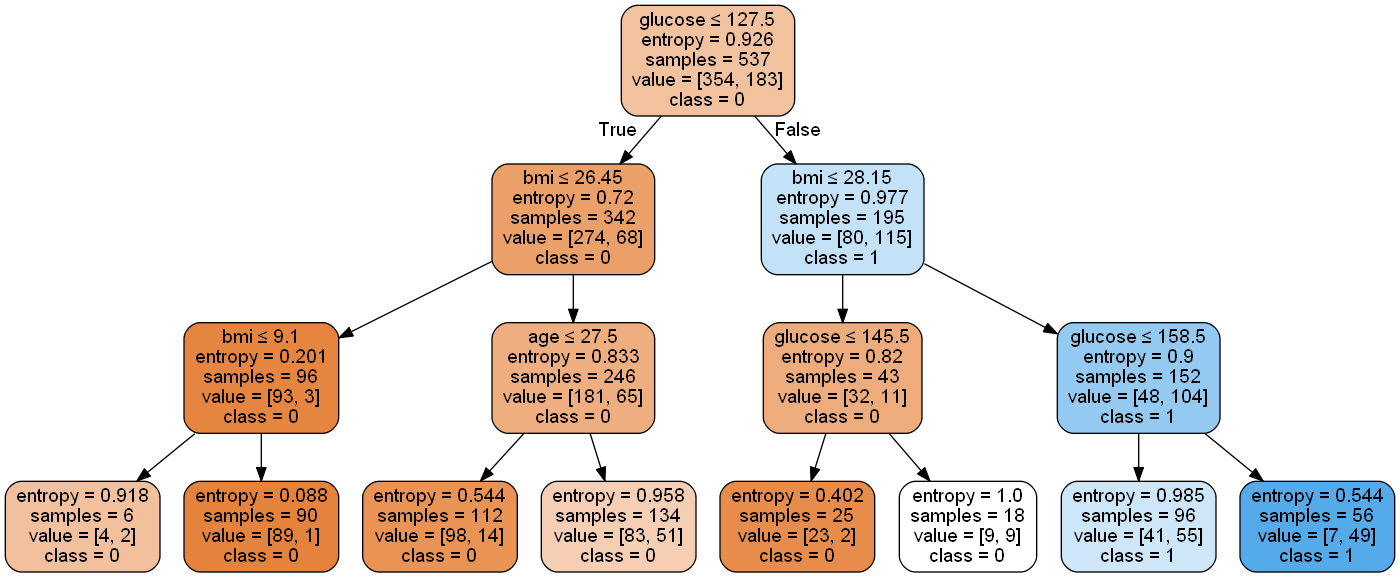

In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Random Forest

기계 학습에서의 랜덤 포레스트(영어: random forest)는 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)를 출력함으로써 동작합니다.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [36]:
X_test.iloc[0].tolist()

[7.0, 135.0, 26.0, 51.0, 136.0, 74.0, 0.647]

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, random_state=0)
# try to change n_estimators to large value (default=200 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Reference : ", y_test[:10].tolist())
print("Predicted : ", y_pred[:10].tolist())
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Reference :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.7878787878787878
